## 22.5 Homework

Choose a dataset from [UC Irvine Machine Learning Repository!](http://archive.ics.uci.edu/ml/index.php) and apply the Kneighbour algorithm to do classification.

I use the Wisconsin dataset for breast cancer. The source information can be found in the folder: Assignment15_datasets/wdbc.data

This data set uses 30 attributes to determine whether a breast tumor is benign (B) or malignant (M).

In [22]:
"""
Import data that I saved in a folder.
Store attribute data into "data,"
store target data (benign or malignant) into "target."
"""

import numpy as np
data = np.loadtxt("Assignment15_datasets/wdbc.data", dtype = float, delimiter=',',usecols=(2,3,4,5,6,7,8,9,10,
                                                                                           11,12,13,14,15,16,17,
                                                                                           18,19,20,21,22,23,24,
                                                                                           25,26,27,28,29,30,31))
target = np.loadtxt("Assignment15_datasets/wdbc.data", dtype = str, delimiter=',', usecols=(1))

In [23]:
"""
Split data set into training data and target data.
"""
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target)

In [20]:
"""
Import KNeighborsClassifier to generate an estimator.
"""
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
estimator.fit(data_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
"""
Determine accuracy of KNeighbor classifier.
"""
target_pred = estimator.predict(data_test)
accuracy = np.mean(target_test == target_pred)*100
print("Accuracy: {0:.1f} %".format(accuracy))

Accuracy: 92.3 %


In [25]:
"""
Determine cross-validation accuracy.
"""

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator, data, target, scoring='accuracy', cv=5)
average_accuracy = np.mean(scores)*100
print("Average accuracy: {0:.1f}%".format(average_accuracy))

Average accuracy: 92.8%


In [26]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

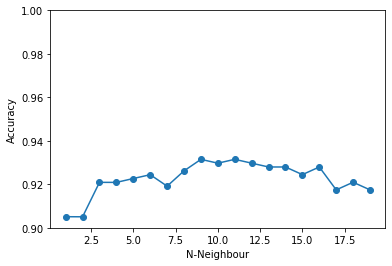

In [27]:
"""
Plot accuracy distribution for N-neighbors.
"""
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.9,1.0])

plt.show()

In [28]:
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
  